In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn as sk
import joblib

In [229]:
df = pd.read_csv('datasets\laptop_price.csv',encoding='latin')

<>:1: SyntaxWarning: invalid escape sequence '\l'
<>:1: SyntaxWarning: invalid escape sequence '\l'
C:\Users\avdhoot\AppData\Local\Temp\ipykernel_4588\1434213189.py:1: SyntaxWarning: invalid escape sequence '\l'
  df = pd.read_csv('datasets\laptop_price.csv',encoding='latin')


In [230]:
df.duplicated().sum()

np.int64(0)

In [231]:
df.drop(columns=['laptop_ID'],inplace=True)

In [232]:
df.duplicated().sum()

np.int64(28)

In [233]:
df = df.drop_duplicates()

In [234]:
df.dtypes

Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

In [235]:
df.shape

(1275, 12)

In [236]:
df.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [237]:
df['Price'] = round(df['Price_euros']*102.45).astype('int')
df.drop(columns=['Price_euros'],inplace=True)

In [238]:
df.sample()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
51,Acer,Aspire A515-51G,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Nvidia GeForce MX150,Windows 10,2.2kg,86160


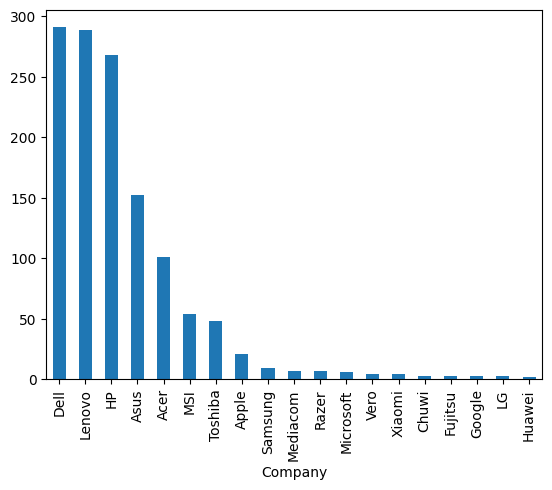

In [239]:
# EDA
#  - Univeriate analysis 
#  - Multiveriate analysis

df['Company'].value_counts().plot(kind='bar')      # Univeriate analysis  just doing analysis on a singel cloumn
plt.show()

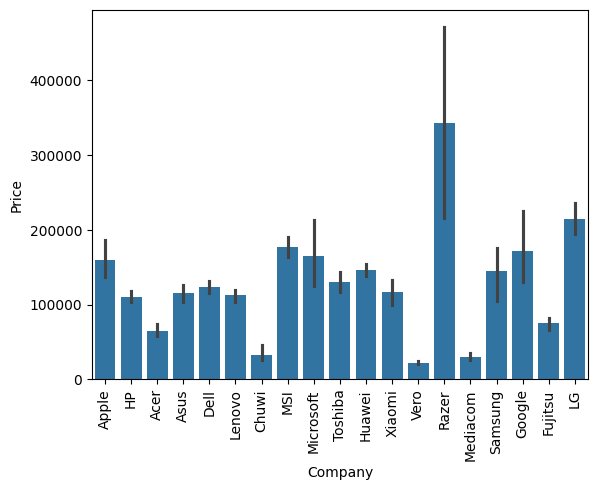

In [240]:
sb.barplot(x=df['Company'], y= df['Price'])
plt.xticks(rotation= 90)
plt.show()

In [241]:
df = df[df.groupby('Company').Company.transform('count')>10].copy()
df['Company'].value_counts()

Company
Dell       291
Lenovo     289
HP         268
Asus       152
Acer       101
MSI         54
Toshiba     48
Apple       21
Name: count, dtype: int64

<Axes: xlabel='Company'>

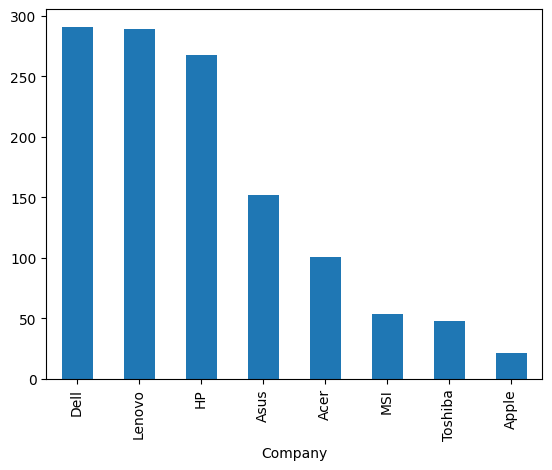

In [242]:
df['Company'].value_counts().plot(kind='bar')

In [243]:
df.sample()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1100,Dell,Latitude E5270,Ultrabook,12.5,1366x768,Intel Core i3 6100U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 7,1.5kg,116296


In [244]:
df = df.drop(columns='Product')

<Axes: xlabel='TypeName'>

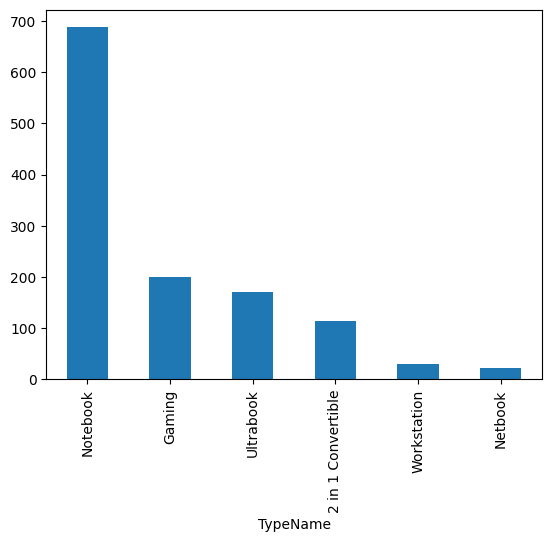

In [245]:
df['TypeName'].value_counts().plot(kind='bar')

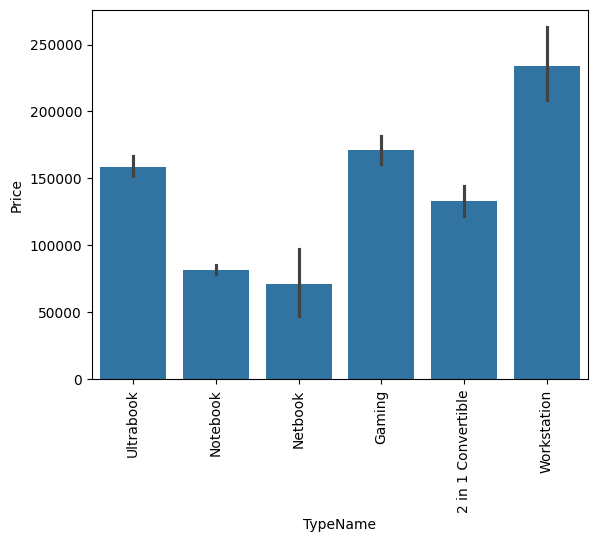

In [246]:
sb.barplot(x=df['TypeName'], y= df['Price'])
plt.xticks(rotation= 90)
plt.show()

<Axes: xlabel='Inches'>

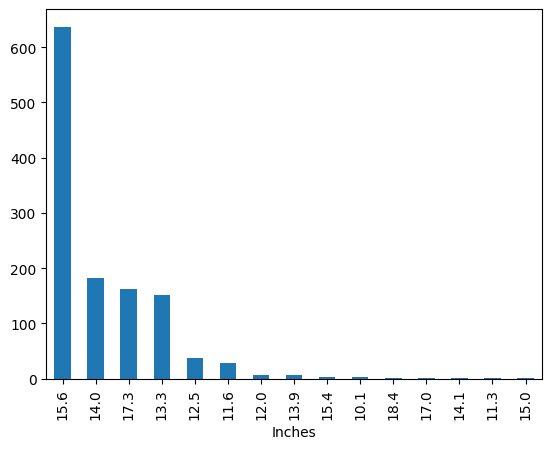

In [247]:
df['Inches'].value_counts().plot(kind='bar')

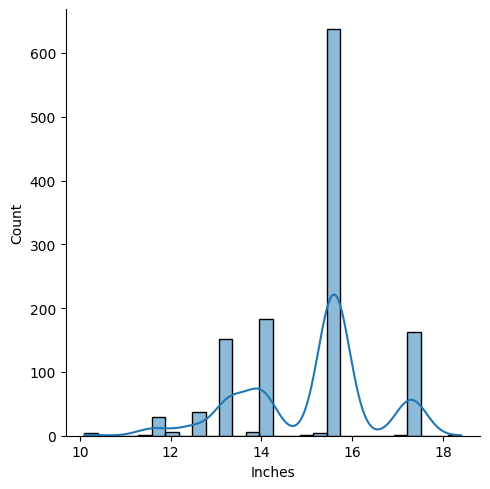

In [248]:
sb.displot(x= df['Inches'],kde=True)

In [249]:
df['ScreenResolution'].value_counts()
b = "IPS Panel Full HD / Touchscreen 1920x1080"
lambda b:b.split()(b).split('x')[0]

<function __main__.<lambda>(b)>

In [250]:
df['X_res'] = df['ScreenResolution'].apply(lambda b:b.split()[-1].split('x')[0]).astype('int')
df['Y_res'] = df['ScreenResolution'].apply(lambda b:b.split()[-1].split('x')[1]).astype('int')

In [251]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0).astype('int')
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0).astype('int')

In [252]:
df.drop(columns='ScreenResolution',inplace=True)

In [253]:
df.sample()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Touchscreen,IPS
1021,Toshiba,Ultrabook,13.3,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.2kg,162896,1920,1080,0,0


In [254]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz              183
Intel Core i7 7700HQ 2.8GHz             142
Intel Core i7 7500U 2.7GHz              124
Intel Core i5 8250U 1.6GHz               71
Intel Core i7 8550U 1.8GHz               71
                                       ... 
Intel Pentium Dual Core 4405Y 1.5GHz      1
Intel Core M 6Y54 1.1GHz                  1
AMD E-Series 9000 2.2GHz                  1
Intel Core M 6Y30 0.9GHz                  1
AMD A9-Series 9410 2.9GHz                 1
Name: count, Length: 111, dtype: int64

In [255]:
df['Cpu'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [256]:
df['Cpu'].value_counts()

Cpu
Intel Core i7               493
Intel Core i5               411
Intel Core i3               134
Intel Celeron Dual           66
Intel Pentium Quad           27
Intel Core M                 16
AMD A9-Series 9420           12
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Celeron Quad            5
Intel Atom x5-Z8550           4
AMD A8-Series 7410            4
Intel Pentium Dual            3
AMD Ryzen 1700                3
AMD A6-Series A6-9220         2
AMD A9-Series A9-9420         2
AMD A10-Series 9600P          2
AMD A10-Series A10-9620P      2
Intel Xeon E3-1505M           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
AMD E-Series 7110             2
AMD A10-Series 9620P          2
AMD E-Series 9000e            1
AMD E-Series E2-6110          1
AMD E-Series 6110             1
AMD FX 9830P                  1
Intel Atom x5-Z8350           1
AMD Ryzen 1600                1
AMD E-Series E2-9000          1
AMD A6-Series 7310            1
AMD 

In [257]:
def series_of_Cpu(text):
    if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3' or text== 'Intel Core M':
        return text
    elif text.split()[0]=="Intel":
        return " ".join(text.split()[0:2])
    else:
        return "AMD Processor"

In [258]:
df['Cpu'] = df['Cpu'].apply(series_of_Cpu)

<Axes: xlabel='Cpu'>

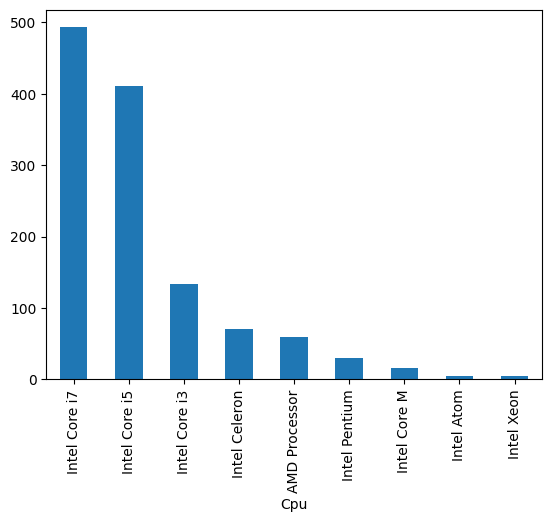

In [259]:
df['Cpu'].value_counts().plot(kind='bar')

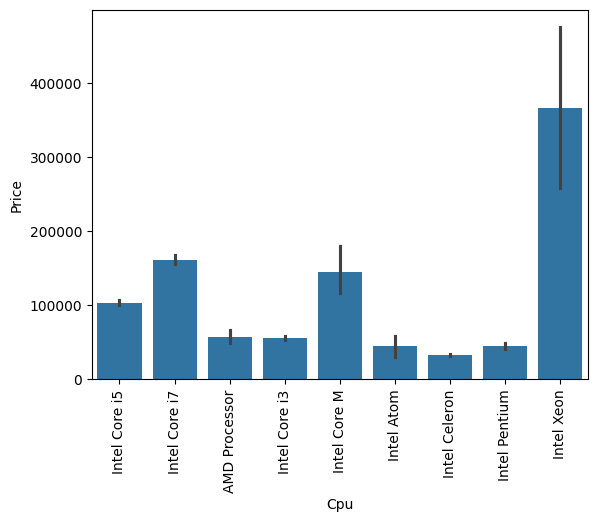

In [260]:
sb.barplot(x=df['Cpu'], y=df['Price'])
plt.xticks(rotation = 90)
plt.show()

In [261]:
df.sample()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Touchscreen,IPS
738,MSI,Gaming,15.6,Intel Core i7,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,1.8kg,214579,1920,1080,0,0


In [262]:
df['Ram'].value_counts()

Ram
8GB     595
4GB     351
16GB    186
6GB      34
12GB     25
32GB     15
2GB      14
24GB      3
64GB      1
Name: count, dtype: int64

In [263]:
df['Ram'] = df['Ram'].apply(lambda x : x.replace('GB','')).astype('int')

<Axes: xlabel='Ram'>

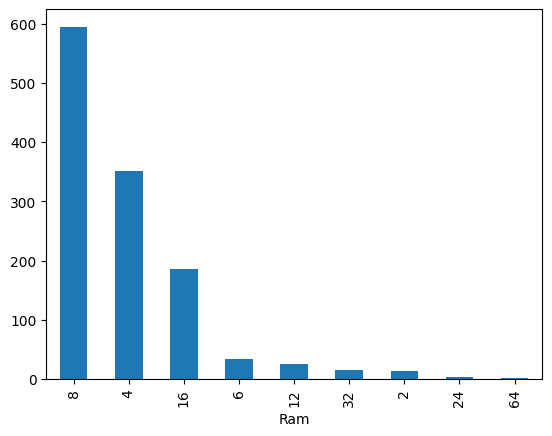

In [264]:
df['Ram'].value_counts().plot(kind='bar')

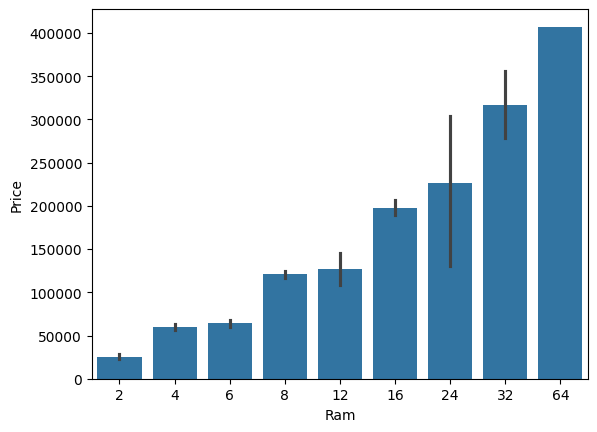

In [265]:
sb.barplot(x=df['Ram'],y=df['Price'])
plt.xticks()
plt.show()

In [266]:
df['Memory']=df['Memory'].astype(str).replace('\.0','',regex=True)
df['Memory']=df['Memory'].str.replace('GB','')
df['Memory']=df['Memory'].str.replace('TB','000')

new=df['Memory'].str.split("+",n=1,expand=True)
df['first']=new[0]
df['first']=df['first'].str.strip()
df['second']=new[1]

df['Layer1HDD']=df['first'].apply(lambda x:1 if 'HDD' in x else 0)
df['Layer1SSD']=df['first'].apply(lambda x:1 if 'SSD' in x else 0)
df['Layer1Hybrid']=df['first'].apply(lambda x:1 if 'Hybrid' in x else 0)
df['Layer1Flash_Storage']=df['first'].apply(lambda x:1 if 'Flash Storage' in x else 0)

df['first']=df['first'].str.replace(r'\D','',regex=True)

df['second'].fillna("0",inplace=True)

df['Layer2HDD']=df['second'].apply(lambda x:1 if 'HDD' in x else 0)
df['Layer2SSD']=df['second'].apply(lambda x:1 if 'SSD' in x else 0)
df['Layer2Hybrid']=df['second'].apply(lambda x:1 if 'Hybrid' in x else 0)
df['Layer2Flash_Storage']=df['second'].apply(lambda x:1 if 'Flash Storage' in x else 0)

df['second']=df['second'].str.replace(r'\D','',regex=True)

df['first']=df['first'].astype('int')
df['second']=df['second'].astype('int')

df['HDD']=df['first']*df['Layer1HDD']+df['second']*df['Layer2HDD']
df['SSD']=df['first']*df['Layer1SSD']+df['second']*df['Layer2SSD']
df['Hybrid']=df['first']*df['Layer1Hybrid']+df['second']*df['Layer2Hybrid']
df['Flash_Storage']=df['first']*df['Layer1Flash_Storage']+df['second']*df['Layer2Flash_Storage']

df.drop(columns=['first','second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash_Storage',
                 'Layer2HDD','Layer2SSD','Layer2Hybrid','Layer2Flash_Storage'],inplace=True)

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\avdhoot\AppData\Local\Temp\ipykernel_4588\665532818.py:1: SyntaxWarning: invalid escape sequence '\.'
  df['Memory']=df['Memory'].astype(str).replace('\.0','',regex=True)
C:\Users\avdhoot\AppData\Local\Temp\ipykernel_4588\665532818.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['second'].fillna("0",inplace=True)


In [267]:
df.drop(columns=['Memory'],inplace=True)


In [268]:
df.sample()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,X_res,Y_res,Touchscreen,IPS,HDD,SSD,Hybrid,Flash_Storage
686,HP,Notebook,15.6,Intel Core i5,4,AMD Radeon 520,Windows 10,1.86kg,62762,1366,768,0,0,500,0,0,0


In [269]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      265
Intel HD Graphics 520      179
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     65
Nvidia GeForce GTX 1060     45
                          ... 
AMD Radeon R5 M315           1
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
Name: count, Length: 108, dtype: int64

In [270]:
df['OpSys'].value_counts()

OpSys
Windows 10      1011
No OS             63
Linux             58
Windows 7         45
Chrome OS         22
macOS             13
Mac OS X           8
Windows 10 S       2
Android            2
Name: count, dtype: int64

In [271]:
def combined_OpSys(text):
    if text== "Windows 10" or text== "Windows 10 S":
        return "Windows 10"
    elif text== "Windows 7":
        return text
    else:
        return "linux/No OS/Other"

In [272]:
df['OpSys'] = df['OpSys'].apply(combined_OpSys)

In [273]:
df['OpSys'].value_counts()

OpSys
Windows 10           1013
linux/No OS/Other     166
Windows 7              45
Name: count, dtype: int64

<Axes: xlabel='OpSys'>

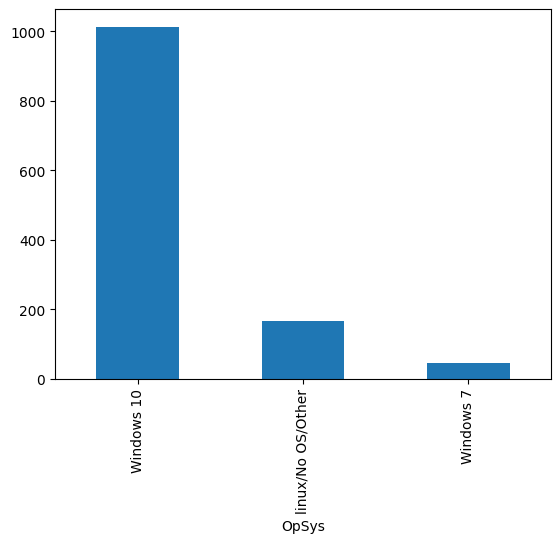

In [274]:
df['OpSys'].value_counts().plot(kind='bar')


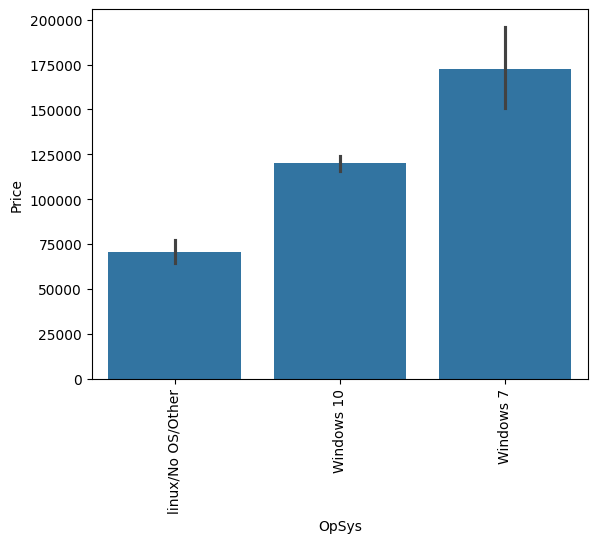

In [275]:
sb.barplot(x=df['OpSys'], y=df['Price'])
plt.xticks(rotation = 90)
plt.show()

In [276]:
df['Weight'].value_counts()

Weight
2.2kg      115
2.1kg       58
2.4kg       42
2.5kg       37
2.3kg       36
          ... 
2.21kg       1
2.191kg      1
1.08kg       1
2.34kg       1
4.0kg        1
Name: count, Length: 175, dtype: int64

In [277]:
df['Weight'] = df['Weight'].apply(lambda x:x.replace('kg','')).astype('float')

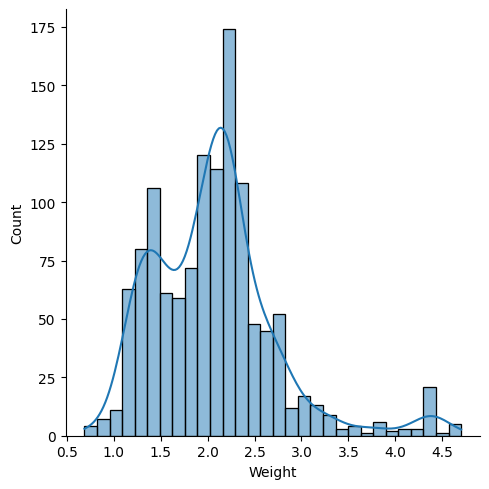

In [278]:
sb.displot(x=df['Weight'],kde = True)

<Axes: xlabel='Weight', ylabel='Price'>

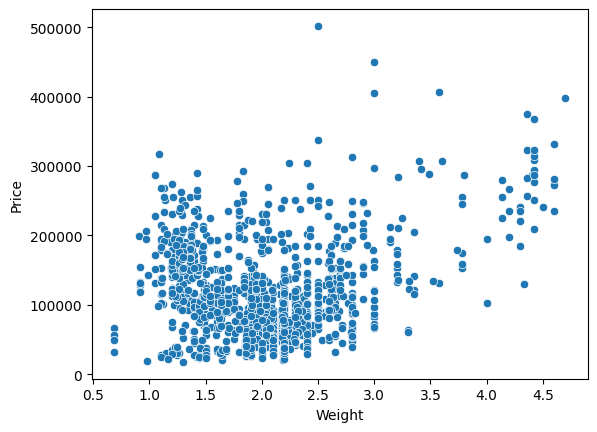

In [279]:
sb.scatterplot(x=df['Weight'],y= df['Price'])

In [280]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      265
Intel HD Graphics 520      179
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     65
Nvidia GeForce GTX 1060     45
                          ... 
AMD Radeon R5 M315           1
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
Name: count, Length: 108, dtype: int64

In [281]:
df['Gpu'] = df['Gpu'].apply(lambda x:x.split()[0])

<Axes: xlabel='Gpu'>

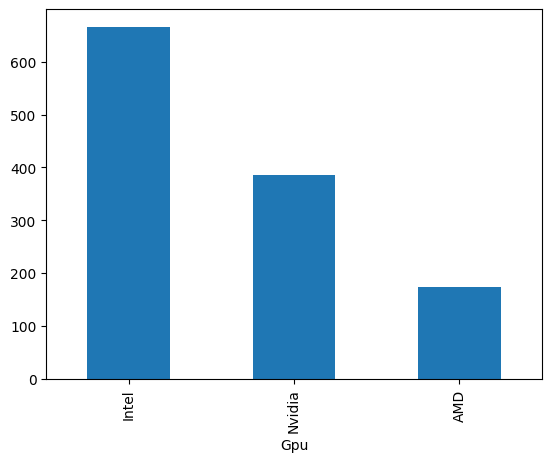

In [282]:
df['Gpu'].value_counts().plot(kind='bar')

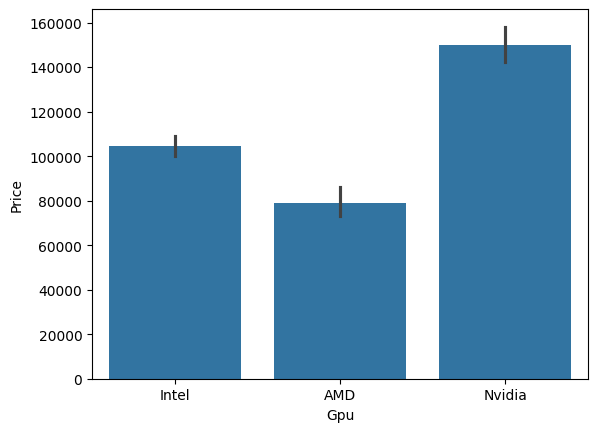

In [283]:
sb.barplot(x=df['Gpu'], y= df['Price'])
plt.show()

In [284]:
df.corr(numeric_only=True)['Price']

Inches           0.055330
Ram              0.726639
Weight           0.212038
Price            1.000000
X_res            0.553707
Y_res            0.552964
Touchscreen      0.161443
IPS              0.289225
HDD             -0.093770
SSD              0.654751
Hybrid           0.025523
Flash_Storage   -0.023384
Name: Price, dtype: float64

In [285]:
df.sample(5)

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,X_res,Y_res,Touchscreen,IPS,HDD,SSD,Hybrid,Flash_Storage
288,Lenovo,Gaming,15.6,Intel Core i7,16,Nvidia,Windows 10,2.50,120789,1920,1080,0,1,1000,256,0,0
938,Dell,Ultrabook,14.0,Intel Core i5,8,Intel,Windows 10,1.36,167916,1920,1080,0,0,0,256,0,0
733,Acer,Notebook,15.6,Intel Core i5,4,Intel,Windows 10,2.40,57270,1366,768,0,0,500,0,0,0
1115,Dell,Ultrabook,13.3,Intel Core i7,8,Intel,Windows 10,1.23,141279,1920,1080,0,0,0,256,0,0
577,Lenovo,Gaming,17.3,Intel Core i7,32,Nvidia,Windows 10,4.60,272824,1920,1080,0,1,1000,256,0,0


In [286]:
df['PPI'] = round(((df['X_res'])**2 +(df['Y_res'])**2)**0.5 /df['Inches']).astype('int')

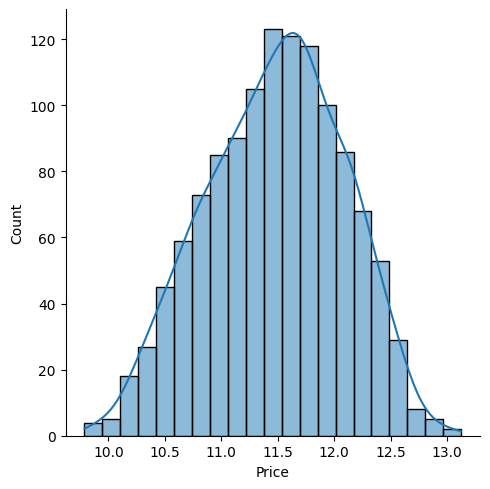

In [287]:
sb.displot(x=np.log(df['Price']),kde = True)
plt.show()

In [288]:
df.sample()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,X_res,Y_res,Touchscreen,IPS,HDD,SSD,Hybrid,Flash_Storage,PPI
930,Lenovo,Notebook,15.6,Intel Pentium,4,Intel,Windows 10,2.2,31657,1366,768,0,0,1000,0,0,0,100


In [289]:
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [290]:
X = df.drop(columns = ['Price'])
y = np.log(df['Price'])

In [291]:
from sklearn.model_selection import train_test_split

In [292]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=42)

In [293]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [294]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor       

In [295]:
X_test.sample()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Touchscreen,IPS,HDD,SSD,Hybrid,Flash_Storage,PPI
970,Dell,2 in 1 Convertible,Intel Core i7,16,Intel,Windows 10,1.22,1,0,0,512,0,0,276


In [296]:
# LinearRegression

step1 = ColumnTransformer(transformers=[
               ('Col_trf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
               ],remainder='passthrough')
step2 = LinearRegression()
pipe = Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print("r2_score",r2_score(y_test,y_pred))
print("mean_absolute_error",mean_absolute_error(y_test,y_pred))
print("mean_squared_error",mean_squared_error(y_test,y_pred))

r2_score 0.7868152610712331
mean_absolute_error 0.20110426712356913
mean_squared_error 0.06731211780499001


In [297]:
# GradientBoostingRegressor

step1 = ColumnTransformer(transformers=[
               ('Col_trf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
               ],remainder='passthrough')
step2 = GradientBoostingRegressor(n_estimators=500)
pipe = Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print("r2_score",r2_score(y_test,y_pred))
print("mean_absolute_error",mean_absolute_error(y_test,y_pred))
print("mean_squared_error",mean_squared_error(y_test,y_pred))

r2_score 0.8683000707600154
mean_absolute_error 0.15352481732708276
mean_squared_error 0.04158365742527575


In [298]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [299]:
%%writefile laptop.py

import streamlit as st
import pickle
import numpy as np
import pandas as pd

df= pickle.load(open('df.pkl','rb'))
pipe= pickle.load(open('pipe.pkl','rb'))

st.title("Prediction model for Laptop Price")

company = st.selectbox("Brand",df['Company'].unique(),index = 3)
type = st.selectbox("Type of Laptop",df['TypeName'].unique(),index = 1)
cpu = st.selectbox("Cpu Name",df['Cpu'].unique(), index=0)
ram = st.selectbox("RAM",np.array([2,4,6,8,12,16,24,32,64,128]),index = 3)
hdd = st.selectbox("HDD Storage",np.array([0,128,500,1000,2000]), index = 2)
ssd= st.selectbox("SSD Storage",np.array([0,8,16,32,64,128,180,240,256,512,768,1000,1024]),index = 9)
hybrid = st.selectbox("Hybrid",np.array([0,508,1000]),index = 2)
flash_storage =  st.selectbox("Flash Storage",np.array([0,16,32,64,128,256,512]),index = 5)
gpu =  st.selectbox("GPU",df['Gpu'].unique(),index = 0)
opsys = st.selectbox("Operating System",df['OpSys'].unique(),index = 1)
weight = st.number_input("weight of the laptop(in kg)",min_value=0.6,max_value= 4.7,value=2.0 ,step =0.1 )
touchscreen = st.selectbox("Touchscreen",["Yes","No"],index = 0)
ips = st.selectbox("IPS",["Yes","No"],index = 0)
screen_size = st.number_input("Screen Size(in Inches, calculated diagonally)",min_value = 10.0,max_value=18.5,step= 0.1,value = 15.6)
screen_resolution = st.selectbox("Screen Resolution",["2560x1600","1440x900","1920x1080","2880x1800",
"1366x768","2304x1440","3200x1800","1920x1200","2256x1504","3840x2160","2160x1440","2560x1440",
"1600x900","2736x1824","2400x1600"],index =2)

if st.button("PREDICT PRICE"):
    # Convert Yes/No to binary
    touchscreen = 1 if touchscreen == "Yes" else 0
    ips = 1 if ips == "Yes" else 0

    # Calculate PPI
    X_res = int(screen_resolution.split('x')[0])
    Y_res = int(screen_resolution.split('x')[1])
    PPI = ((X_res**2) + (Y_res**2))**0.5 / screen_size

    # Build query as DataFrame with SAME column names as training data
    query_df = pd.DataFrame([[company, type, cpu, ram, hdd, ssd, hybrid, 
                              flash_storage, gpu, opsys, weight, touchscreen, ips, PPI]],
                            columns=['Company','TypeName','Cpu','Ram','Memory','HDD',
                                     'SSD','Hybrid','Flash_Storage','Gpu','OpSys',
                                     'Weight','Touchscreen','IPS','PPI'])

    # Predict
    op = np.exp(pipe.predict(query_df))
    st.subheader(f"The Predicted Price of the Laptop with above configuration is ₹{str(round(op[0]))}")


Overwriting laptop.py


In [300]:
X_train.sample()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Touchscreen,IPS,HDD,SSD,Hybrid,Flash_Storage,PPI
1253,Lenovo,Notebook,Intel Core i5,8,Intel,Windows 10,1.9,0,1,0,256,0,0,157
